1. Importing Libraries

In [3]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

np.random.seed(42)

In [4]:
# Load dataset and printing shapes
data = pd.read_csv('NY-House-Dataset.csv')
print("Data Shape:", data.shape)
print("\nData Types:\n", data.dtypes)

# Checking for missing values
print("\nMissing Values:\n", data.isnull().sum())

# First 5 rows
data.head()

Data Shape: (4801, 17)

Data Types:
 BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

Missing Values:
 BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


2. Exploratory Data Analysis and Visualization

Descriptive Statistics:
               PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  


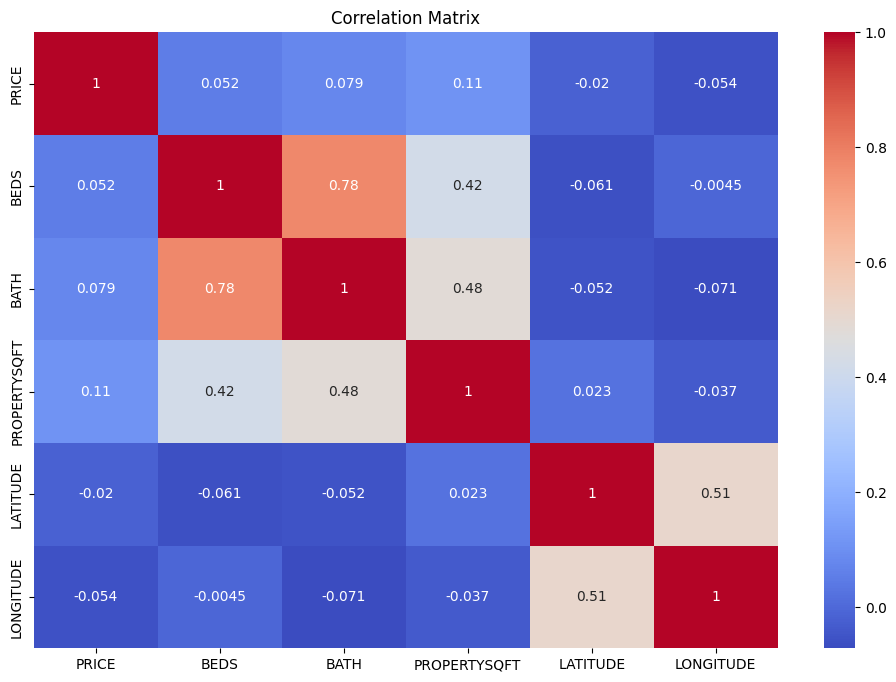

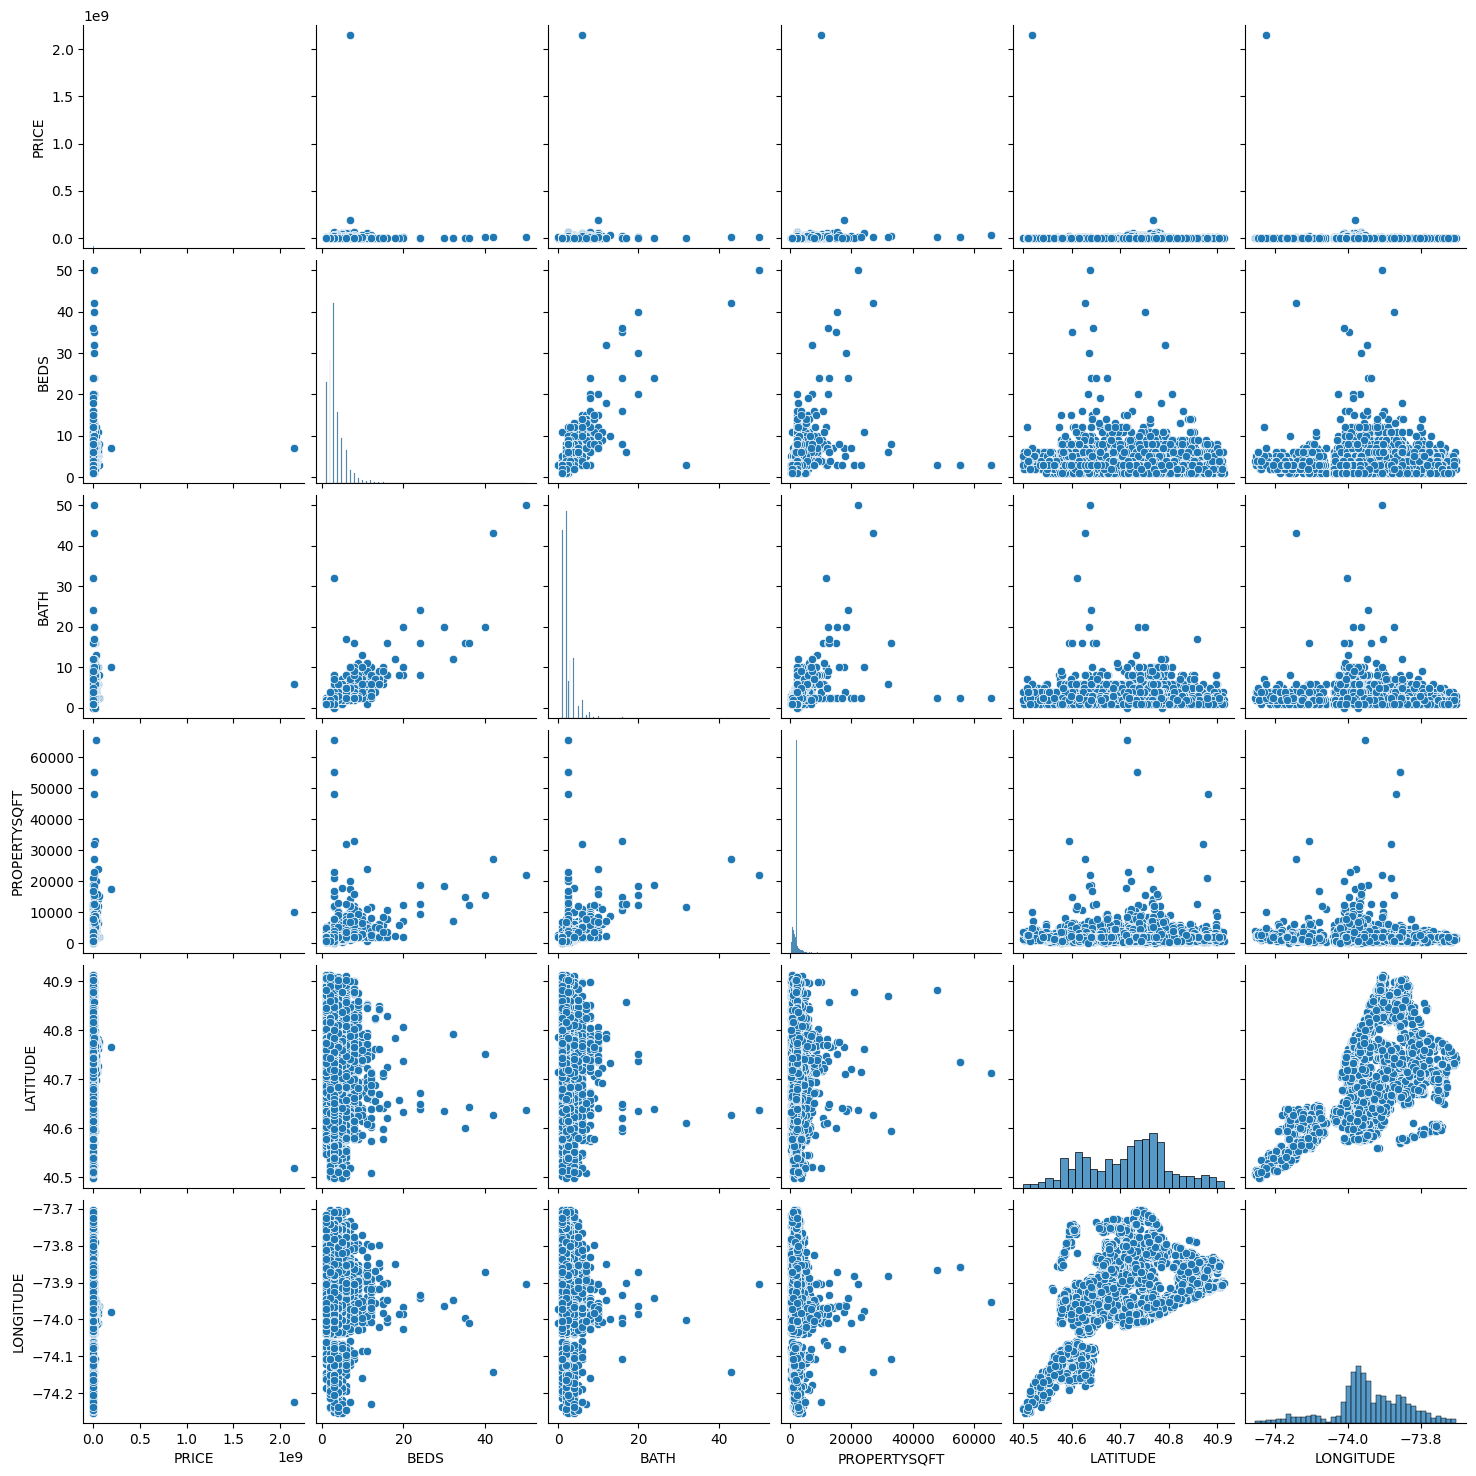

In [5]:
# Summary stats for numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Descriptive Statistics:\n", data[num_cols].describe())

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(data[num_cols])
plt.show()

3. Data Preprocessing

3.1 Feature Engineering and Categorical Encoding

In [6]:
# Defining feature columns and target variables
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE',
           'STATE', 'LOCALITY', 'SUBLOCALITY']
target = 'PRICE'

# Split data into features X and target (y)
X = data[features]
y = data[target]

# Identifying numerical and categorical features
num_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
cat_features = ['STATE', 'LOCALITY', 'SUBLOCALITY']

# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # Removed sparse parameter
    ])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Evaluate model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training R²: {train_score:.3f}")
print(f"Test R²: {test_score:.3f}")

Training R²: 0.865
Test R²: 0.641


In [7]:
# Converting numerical columns to numeric, coercing errors to NaN
for col in num_features:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Filling NaN values if needed
X_train[num_features] = X_train[num_features].fillna(X_train[num_features].median())
X_test[num_features] = X_test[num_features].fillna(X_train[num_features].median())

3.2 Train-Test Split

In [8]:
# Splittind data into training & test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (3840, 8)
Test set shape: (961, 8)


3.3 Feature Scaling

In [9]:
# Select numerical features from training set
num_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
X_train_num = X_train[num_features]

# Standarize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)

In [10]:
# Turn scaled data into a DataFrame
scaled_df = pd.DataFrame(X_train_scaled, columns=num_features)
print(scaled_df.describe().loc[['mean', 'std']])

              BEDS          BATH  PROPERTYSQFT      LATITUDE     LONGITUDE
mean -3.885781e-17 -8.326673e-17  4.996004e-17 -4.705495e-15  1.497321e-14
std   1.000130e+00  1.000130e+00  1.000130e+00  1.000130e+00  1.000130e+00


In [11]:
print("Actual columns in X_train:", X_train.columns.tolist())

Actual columns in X_train: ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'STATE', 'LOCALITY', 'SUBLOCALITY']


In [12]:
# Keeping features only exisisting in training data
available_num_features = [col for col in num_features if col in X_train.columns]
available_cat_features = [col for col in cat_features if col in X_train.columns]

print("Available numerical features:", available_num_features)
print("Available categorical features:", available_cat_features)

# Setting preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), available_num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), available_cat_features)
    ])

Available numerical features: ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
Available categorical features: ['STATE', 'LOCALITY', 'SUBLOCALITY']


In [13]:
# Displaying columns names from dataset
print("All columns in data:", data.columns.tolist())

# Using only features that exist in dataset
features = [col for col in ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE',
                          'STATE', 'LOCALITY', 'SUBLOCALITY'] if col in data.columns]
target = 'PRICE'

# Split into input (X) and target (y)
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chekcing available numeric & categorical columns
num_features = [col for col in ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'] if col in X_train.columns]
cat_features = [col for col in ['STATE', 'LOCALITY', 'SUBLOCALITY'] if col in X_train.columns]

# Set up preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# Try applying the preprocesing
try:
    X_train_scaled = preprocessor.fit_transform(X_train)
    X_test_scaled = preprocessor.transform(X_test)
    print("Preprocessing successful!")
    print(f"New training shape: {X_train_scaled.shape}")
except Exception as e:
    print(f"Error: {str(e)}")

All columns in data: ['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']
Preprocessing successful!
New training shape: (3840, 328)


4. Model Building and Training

4.1 Simple Linear Regression (Single Feature)

In [14]:
# Train a simple linear regression using only PROPERTYSQFT (property size)
simple_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
simple_lr.fit(X_train[['PROPERTYSQFT']], y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Columns in X_train: ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'STATE', 'LOCALITY', 'SUBLOCALITY']
R² Score: 0.171
MSE: 20,898,868,162,150


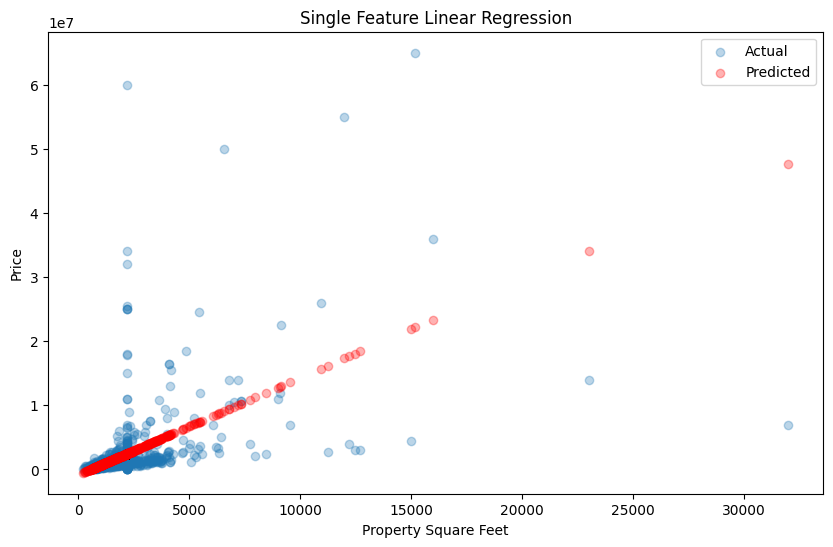

In [15]:
print("Columns in X_train:", X_train.columns.tolist())

#Creating pipeline with correct feature name
simple_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

#Fitting using existing column (PROPERTYSQFT instead of GROSS SQUARE FEET)
simple_lr.fit(X_train[['PROPERTYSQFT']], y_train)

y_pred = simple_lr.predict(X_test[['PROPERTYSQFT']])
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):,.0f}")

plt.figure(figsize=(10,6))
plt.scatter(X_test['PROPERTYSQFT'], y_test, alpha=0.3, label='Actual')
plt.scatter(X_test['PROPERTYSQFT'], y_pred, alpha=0.3, color='r', label='Predicted')
plt.xlabel('Property Square Feet')
plt.ylabel('Price')
plt.title('Single Feature Linear Regression')
plt.legend()
plt.show()

4.2 Multiple Linear Regression

In [16]:
# Linear regression with multiple features and preprocessing
multiple_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

multiple_lr.fit(X_train, y_train)

# Random Forest regressor with preprocessing
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
]).fit(X_train, y_train)

# XGBoost regressor with preprocessing
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
]).fit(X_train, y_train)


Model Performance Comparison:
                         R²          RMSE
Random Forest      0.640882  3.007976e+06
XGBoost            0.516659  3.489655e+06
Linear Regression  0.340890  4.075066e+06


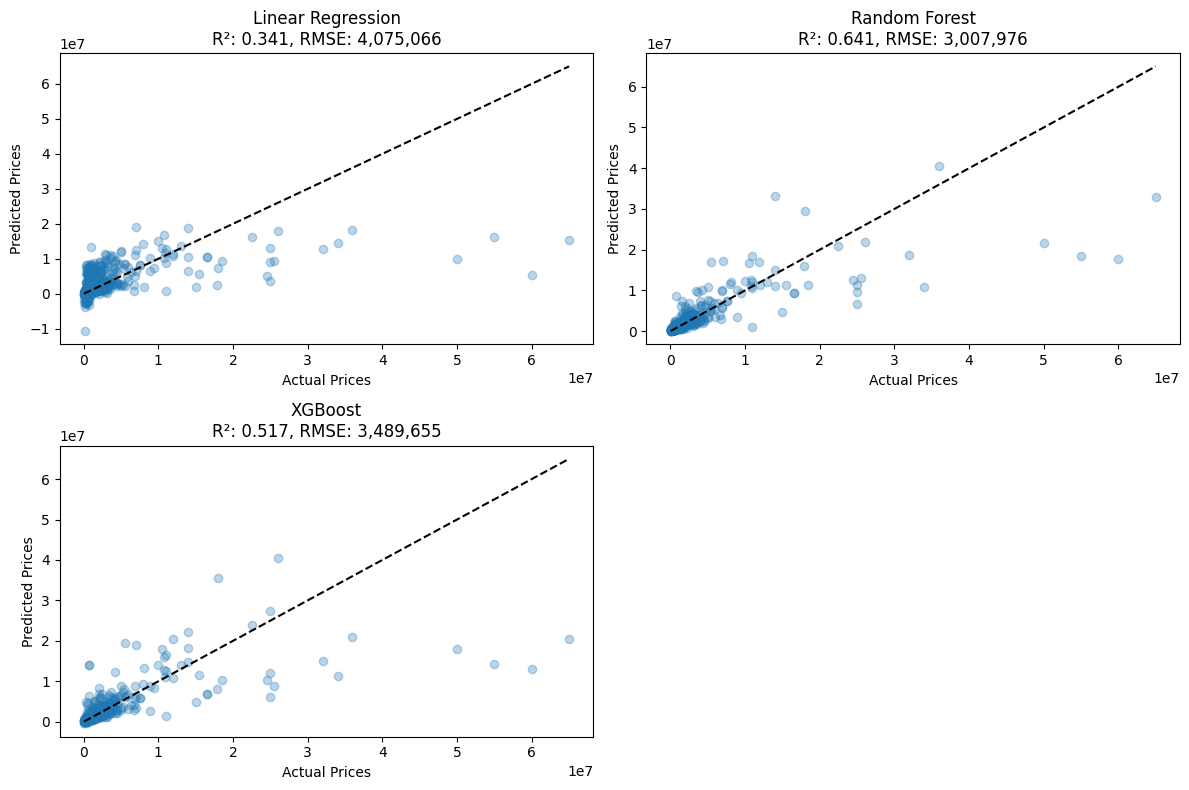

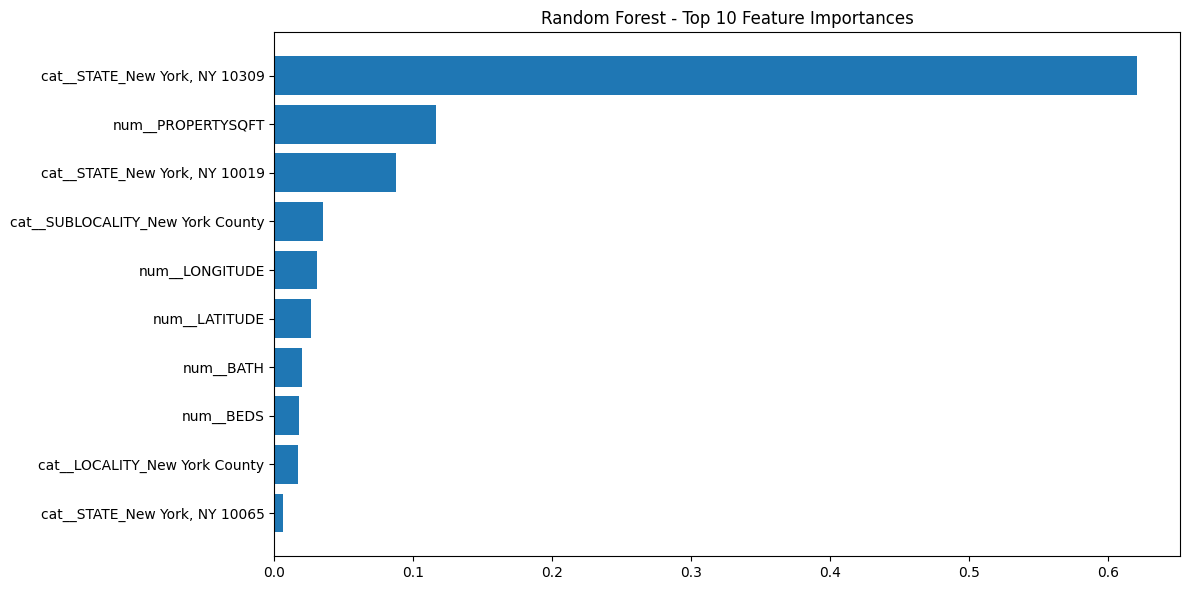

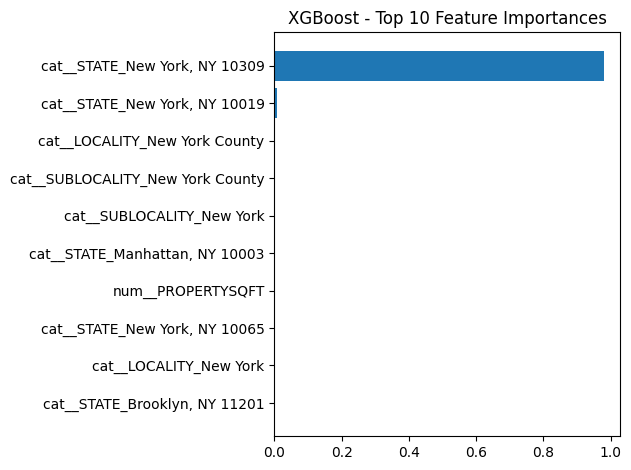

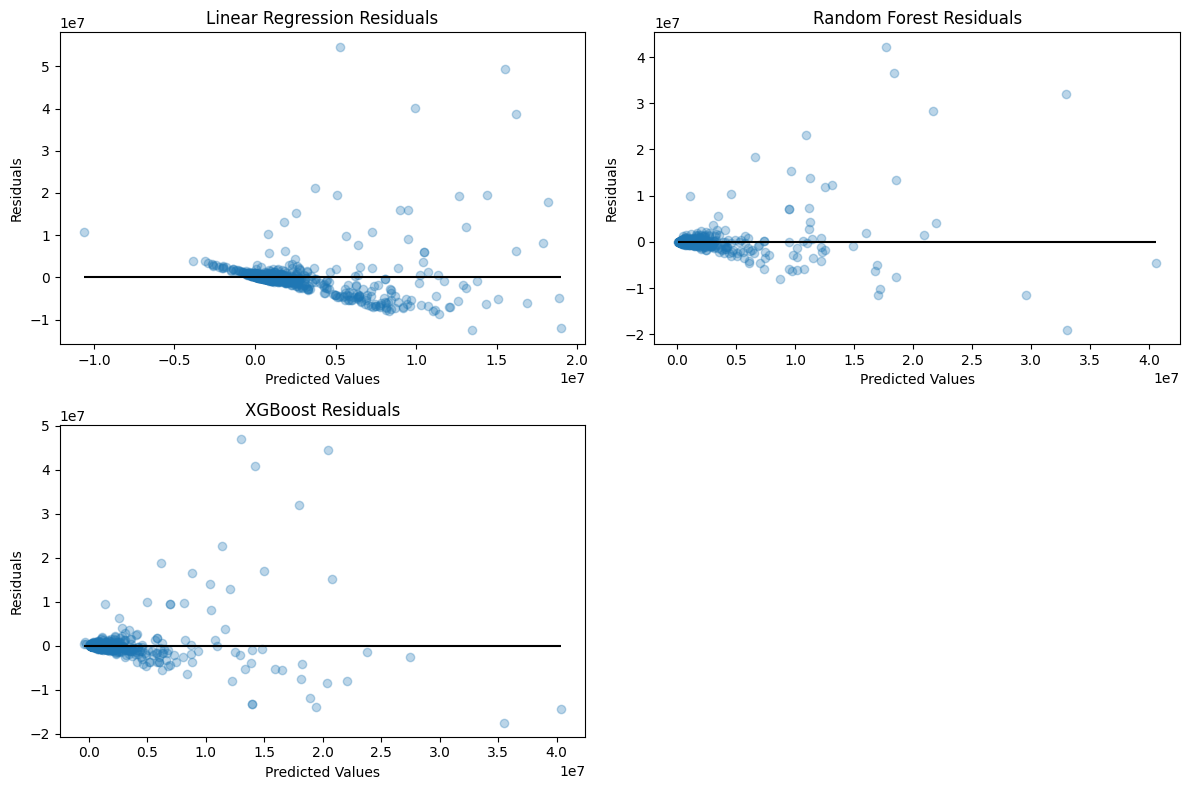

In [17]:
#Training all models
models = {
    'Linear Regression': multiple_lr,
    'Random Forest': rf,
    'XGBoost': xgb
}

#Evaluating and storing results
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'R²': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values('R²', ascending=False))

#Actual vs Predicted
plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{name}\nR²: {results[name]["R²"]:.3f}, RMSE: {results[name]["RMSE"]:,.0f}')
plt.tight_layout()
plt.show()

#Feature Importance (for tree based models)
plt.figure(figsize=(12, 6))

# For Random Forest
try:
    rf_feature_importances = rf.named_steps['regressor'].feature_importances_
    sorted_idx = rf_feature_importances.argsort()
    features = preprocessor.get_feature_names_out()
    plt.barh(np.array(features)[sorted_idx][-10:], rf_feature_importances[sorted_idx][-10:])
    plt.title('Random Forest - Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()
except AttributeError:
    pass

# For XGBoost
try:
    xgb_feature_importances = xgb.named_steps['regressor'].feature_importances_
    sorted_idx = xgb_feature_importances.argsort()
    plt.barh(np.array(features)[sorted_idx][-10:], xgb_feature_importances[sorted_idx][-10:])
    plt.title('XGBoost - Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()
except AttributeError:
    pass

#Residual Plots
plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.subplot(2, 2, i)
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} Residuals')
plt.tight_layout()
plt.show()

5. Model Evaluation and Performance Metrics

Model Performance Metrics:


,R²,Adjusted R²,MAE,MSE,RMSE,MAPE
Model,,,,,,
Linear Regression,0.341,0.335,"1,496,896","16,606,161,965,106","4,075,066",141.1%
Random Forest,0.641,0.638,"764,302","9,047,918,334,927","3,007,976",35.4%
XGBoost,0.517,0.513,"914,308","12,177,688,756,224","3,489,655",50.2%


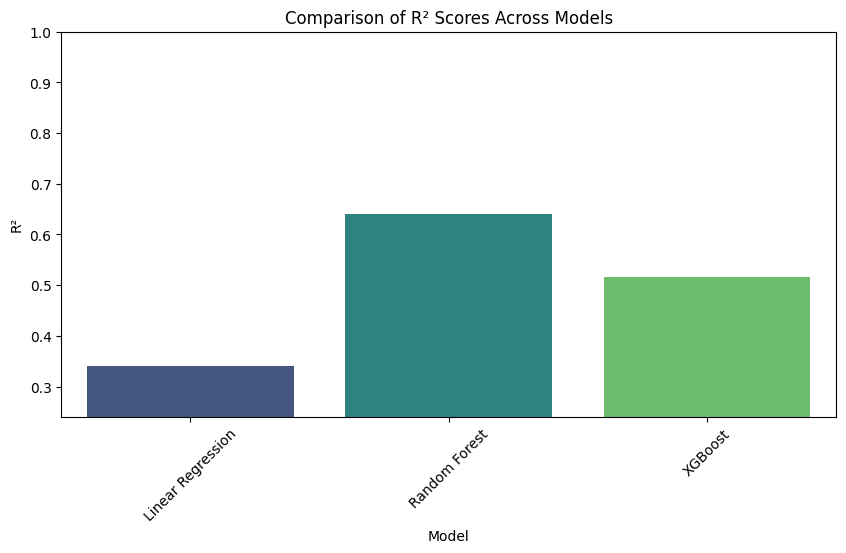

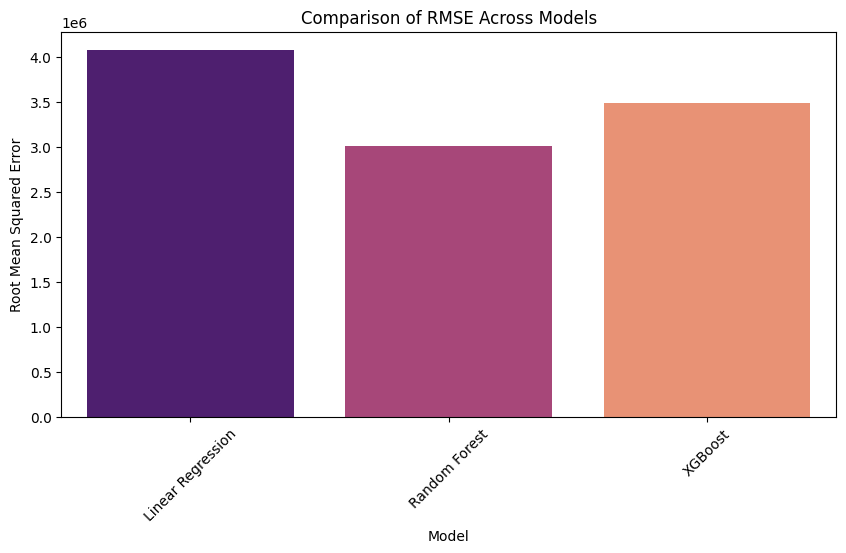

In [18]:
metrics_dict = {
    'Model': [],
    'R²': [],
    'Adjusted R²': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'MAPE': []
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    try:
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    except ZeroDivisionError:
        mape = np.nan
    metrics_dict['Model'].append(model_name)
    metrics_dict['R²'].append(r2)
    metrics_dict['Adjusted R²'].append(adj_r2)
    metrics_dict['MAE'].append(mae)
    metrics_dict['MSE'].append(mse)
    metrics_dict['RMSE'].append(rmse)
    metrics_dict['MAPE'].append(mape)

metrics_df = pd.DataFrame(metrics_dict).set_index('Model')
print("Model Performance Metrics:")
display(metrics_df.style.format({
    'R²': '{:.3f}',
    'Adjusted R²': '{:.3f}',
    'MAE': '{:,.0f}',
    'MSE': '{:,.0f}',
    'RMSE': '{:,.0f}',
    'MAPE': '{:.1f}%'
}).background_gradient(cmap='Blues', subset=['R²', 'Adjusted R²']) \
                    .background_gradient(cmap='Reds_r', subset=['MAE', 'MSE', 'RMSE', 'MAPE']))

# Visualize R² scores across models
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df.index, y='R²', data=metrics_df, palette='viridis')
plt.ylim(metrics_df['R²'].min() - 0.1, 1.0)
plt.title('Comparison of R² Scores Across Models')
plt.xticks(rotation=45)
plt.show()


# Visualize RMSE across models
plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_df.index, y='RMSE', data=metrics_df, palette='magma')
plt.title('Comparison of RMSE Across Models')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

6. Residual Analysis

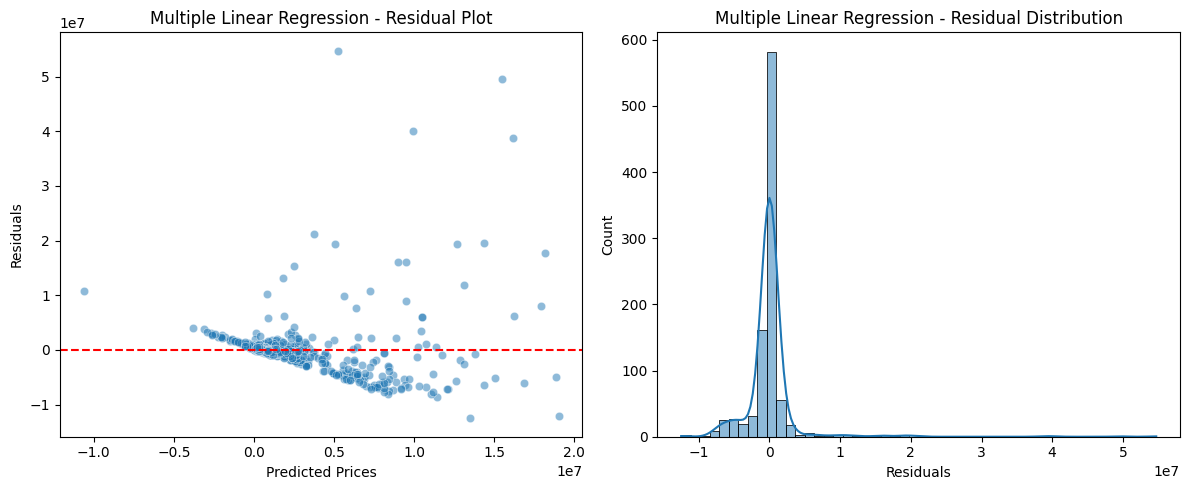

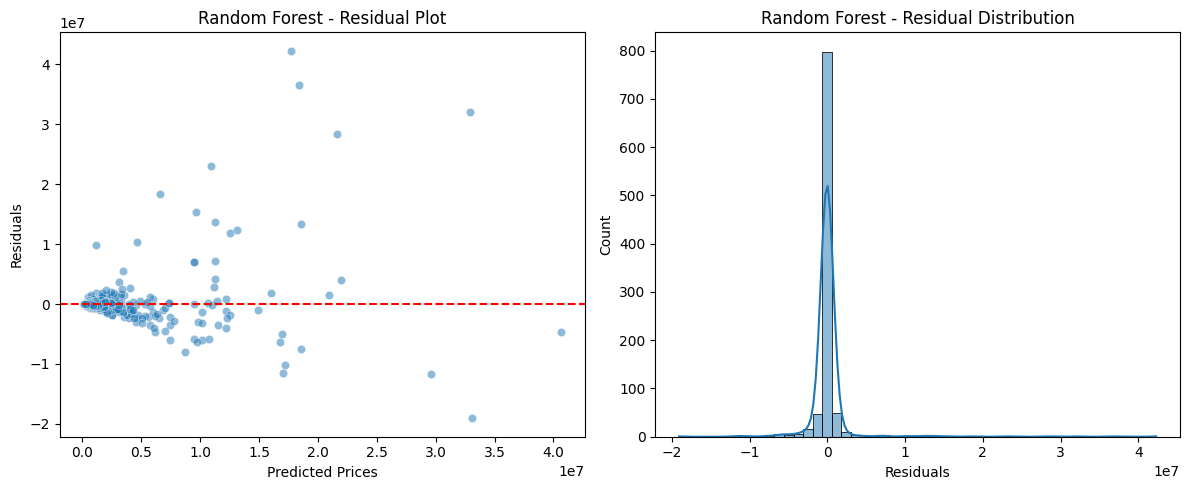

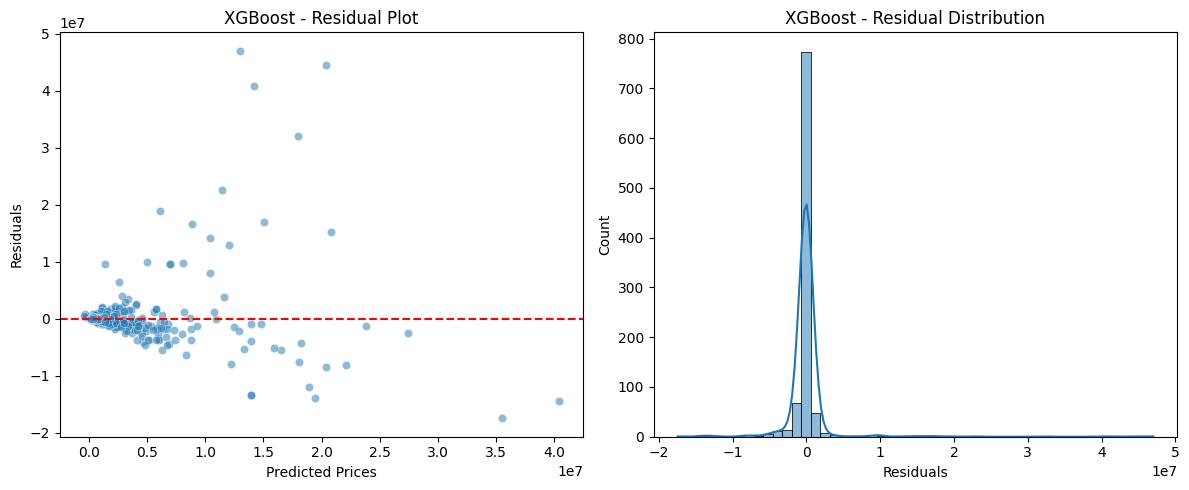

In [19]:
def plot_residuals(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Prices')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residual Plot')

    plt.subplot(1,2,2)
    sns.histplot(residuals, kde=True, bins=50)
    plt.xlabel('Residuals')
    plt.title(f'{model_name} - Residual Distribution')

    plt.tight_layout()
    plt.show()

# Plot residuals for each model to check prediction errors
plot_residuals(multiple_lr, X_test, y_test, "Multiple Linear Regression")
plot_residuals(rf, X_test, y_test, "Random Forest")
plot_residuals(xgb, X_test, y_test, "XGBoost")

7. Making Predictions on New Data

In [20]:
# Creating new data with the SAME features used in training
new_properties = pd.DataFrame({
    'BEDS': [2, 3],
    'BATH': [2, 2],
    'PROPERTYSQFT': [750, 1200],
    'LATITUDE': [40.7128, 40.7870],
    'LONGITUDE': [-74.0060, -73.9754],
    'STATE': ['NY', 'NY'],
    'LOCALITY': ['New York', 'New York'],
    'SUBLOCALITY': ['Manhattan', 'Manhattan']
})

new_properties = new_properties[X_train.columns]
# Making predictions with our best model (XGBoost)
try:
    predictions = xgb.predict(new_properties)
    print("\nPredicted Prices for New Properties:")
    for i, price in enumerate(predictions):
        print(f"Property {i+1}: ${price:,.2f}")
except Exception as e:
    print(f"Prediction failed: {str(e)}")


Predicted Prices for New Properties:
Property 1: $1,867,064.50
Property 2: $1,383,619.25


8. Model Limitations and Business Considerations

In [21]:
print("""
Model Limitations:
1. Doesn’t consider house condition or special features like views
2. Predictions may be off for rare or unusual properties

Business Considerations:
1. Use model results as rough estimates, not exact prices
2. Always check local market trends and expert opinions
""")


Model Limitations:
1. Doesn’t consider house condition or special features like views
2. Predictions may be off for rare or unusual properties

Business Considerations:
1. Use model results as rough estimates, not exact prices
2. Always check local market trends and expert opinions



9. Advanced: Polynomial Features


Model Comparison:


,R2,MAE,RMSE
Model,,,
Multiple Linear Regression,0.3409,"1,496,896","4,075,066"
Polynomial Regression (degree=2),-0.6091,"2,226,343","6,367,181"


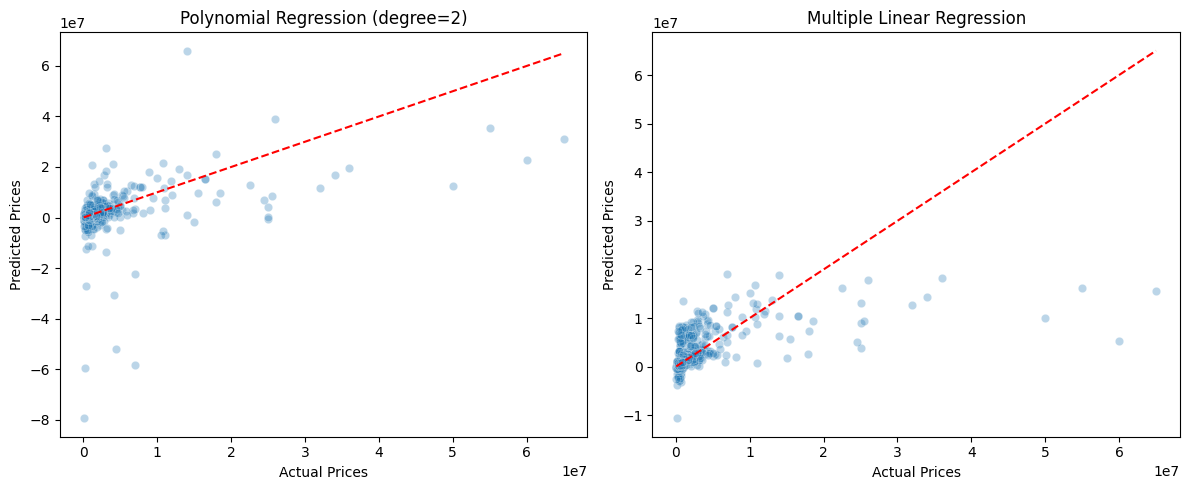


R2 Improvement over linear regression: -0.9500
Linear model performs better or equal.


In [22]:
# 1. Create polynomial regression pipeline
poly_reg = Pipeline([
    ('preprocessor', preprocessor),  # Your existing preprocessor
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# 2. Fit the model
poly_reg.fit(X_train, y_train)

# 3. Evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    metrics = {
        'Model': model_name,
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }
    return metrics

# 4. Evaluate both models
multi_metrics = evaluate_model(multiple_lr, X_test, y_test, "Multiple Linear Regression")
poly_metrics = evaluate_model(poly_reg, X_test, y_test, "Polynomial Regression (degree=2)")

# 5. Compare results
results_df = pd.DataFrame([multi_metrics, poly_metrics]).set_index('Model')
print("\nModel Comparison:")
display(results_df.style.format({
    'R2': '{:.4f}',
    'MAE': '{:,.0f}',
    'RMSE': '{:,.0f}'
}).background_gradient(cmap='Blues'))

# 6. Plot actual vs predicted
plt.figure(figsize=(12, 5))

# Polynomial regression plot
plt.subplot(1, 2, 1)
y_pred_poly = poly_reg.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Polynomial Regression (degree=2)')

# Linear regression plot for comparison
plt.subplot(1, 2, 2)
y_pred_linear = multiple_lr.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression')

plt.tight_layout()
plt.show()

# 7. Print improvement
r2_improvement = poly_metrics['R2'] - multi_metrics['R2']
print(f"\nR2 Improvement over linear regression: {r2_improvement:.4f}")
if r2_improvement > 0:
    print("Polynomial model performs better!")
else:
    print("Linear model performs better or equal.")


R2 Improvement over linear regression: -0.9500


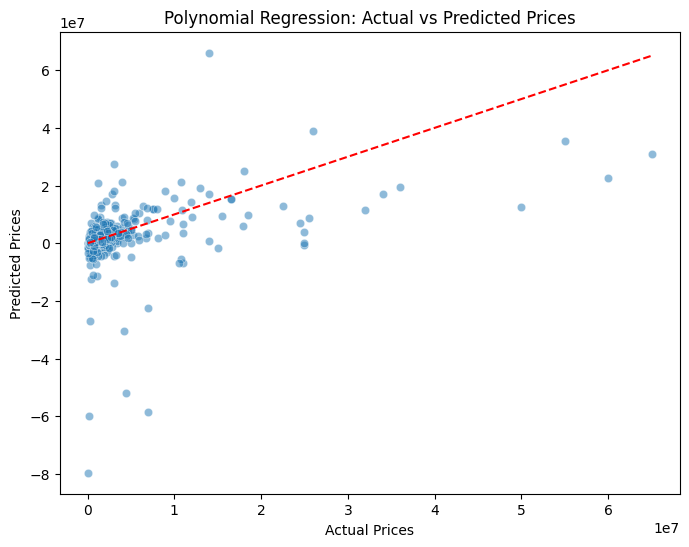

In [23]:
poly_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

poly_reg.fit(X_train, y_train)

poly_metrics = evaluate_model(poly_reg, X_test, y_test, "Polynomial Regression (degree=2)")

# Comparing with linear regression
print(f"\nR2 Improvement over linear regression: {poly_metrics['R2'] - multi_metrics['R2']:.4f}")

# Plot actual vs predicted for polynomial model
y_pred_poly = poly_reg.predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Polynomial Regression: Actual vs Predicted Prices')
plt.show()
